<a href="https://colab.research.google.com/github/raohxxx/challenge-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [47]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [48]:
tiendas=[tienda1,tienda2,tienda3,tienda4]
ventas=[]
for tiendax in tiendas:

  ventas.append(float(tiendax['Precio'].sum()))

ventas



[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

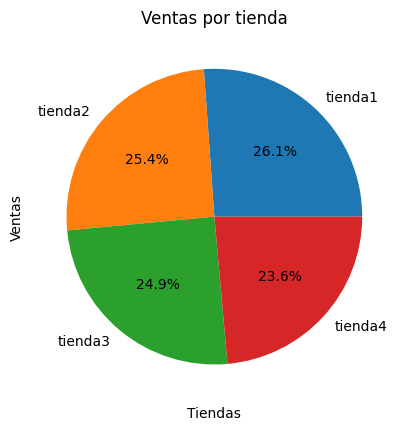

In [49]:
import matplotlib.pyplot as plt
#plt.bar(['tienda','tienda2','tienda3','tienda4'],ventas)
plt.title('Ventas por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ventas')
plt.pie( ventas,labels=['tienda1','tienda2','tienda3','tienda4'],autopct='%1.1f%%')

plt.show()


# 2. Ventas por categoría

In [50]:
ventas1=tienda1['Categoría del Producto'].value_counts()
ventas2=tienda2['Categoría del Producto'].value_counts()
ventas3=tienda3['Categoría del Producto'].value_counts()
ventas4=tienda4['Categoría del Producto'].value_counts()

consolidado = pd.concat([ventas1, ventas2, ventas3, ventas4], axis=1)
consolidado.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
consolidado

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


# 3. Calificación promedio de la tienda


In [62]:
Promedio_calificacion=[]

for tiendax in tiendas:
  #print(float(tiendax['Calificación'].mean()))
  Promedio_calificacion.append(float(tiendax['Calificación'].mean()))

Promedio_calificacion
#float(tienda1['Calificación'].mean())

[3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda